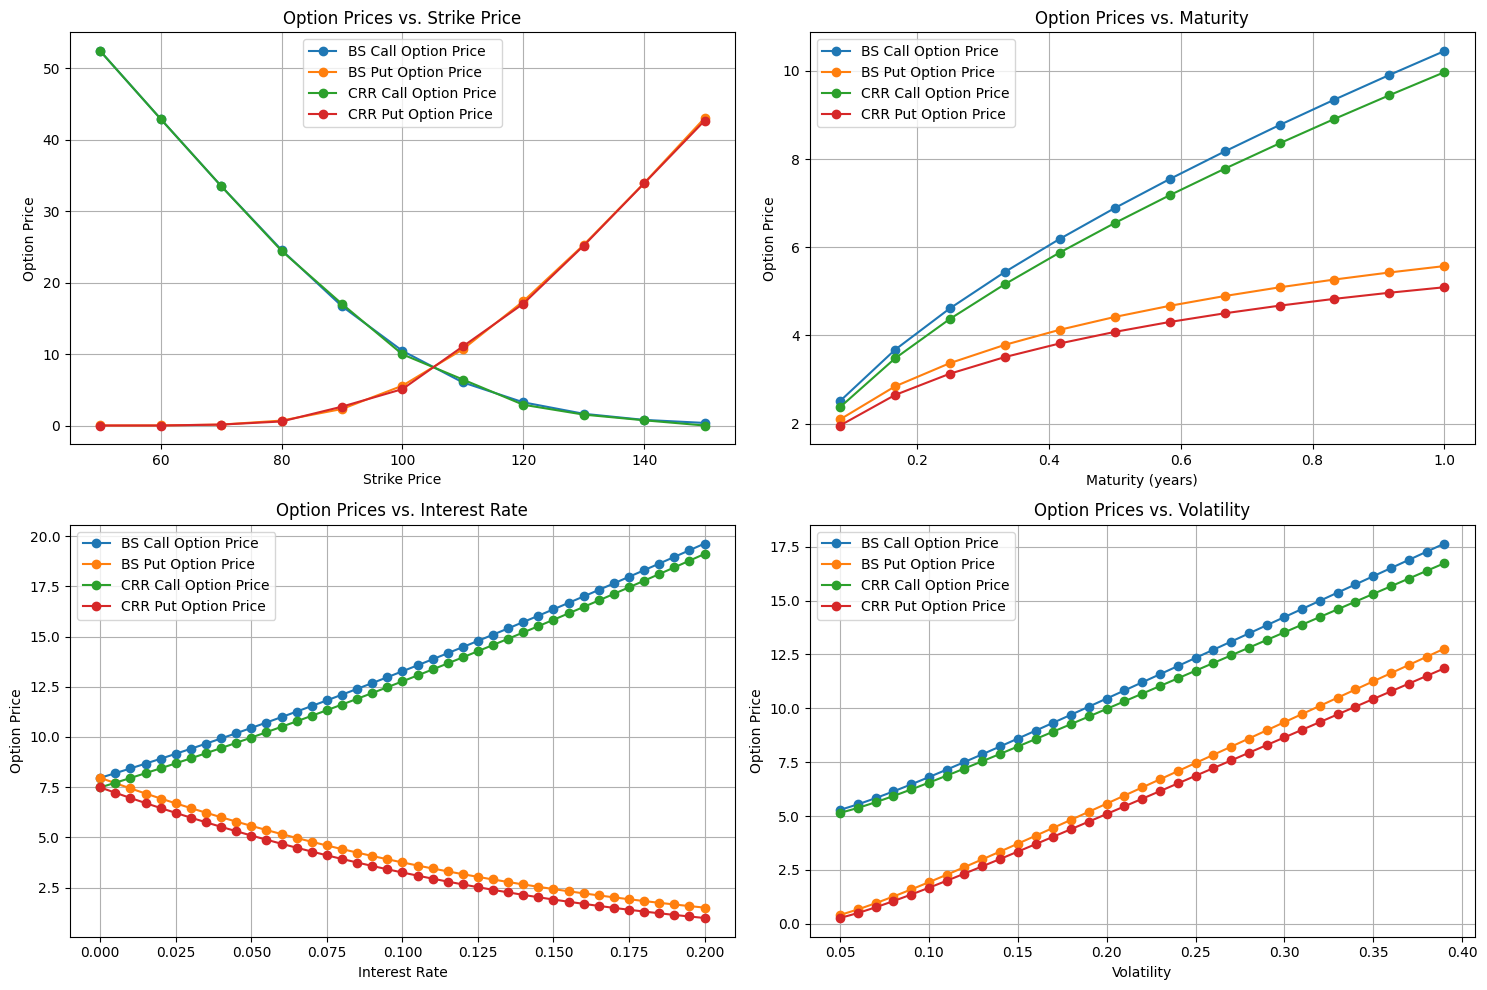

In [ ]:
import math
import matplotlib.pyplot as plt

def black_scholes(option_type, S, K, r, T, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option_type == "call":
        option_price = S * norm_cdf(d1) - K * math.exp(-r * T) * norm_cdf(d2)
    elif option_type == "put":
        option_price = K * math.exp(-r * T) * norm_cdf(-d2) - S * norm_cdf(-d1)

    return option_price

def norm_cdf(x):
    return (1 + math.erf(x / math.sqrt(2))) / 2

def crr_option(option_type, S, K, r, T, sigma, N):
    dt = T / N
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    p = (math.exp(r * dt) - d) / (u - d)
    q = 1 - p

    # Initialize option price matrix
    option_prices = [[0 for _ in range(i + 1)] for i in range(N + 1)]

    # Calculate option prices at maturity
    for j in range(N + 1):
        if option_type == "call":
            option_prices[N][j] = max(0, S * (u ** (N - j)) * (d ** j) - K)
        elif option_type == "put":
            option_prices[N][j] = max(0, K - S * (u ** (N - j)) * (d ** j))

    # Backward induction to calculate option prices at earlier nodes
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_prices[i][j] = math.exp(-r * dt) * (p * option_prices[i + 1][j] + q * option_prices[i + 1][j + 1])

    return option_prices[0][0]

# Parameters
S = 100   # Current stock price
K = 100   # Strike price (fixed)
r = 0.05  # Risk-free interest rate
T = 1     # Time to expiration (in years)
sigma = 0.2  # Volatility
N = 4   # Number of steps in the binomial tree

# Creating a vector of strike prices
strike_prices = range(50, 151, 10)

# Plotting Strike Price vs Option Price
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)

# Black-Scholes model
bs_call_prices = [black_scholes("call", S, K, r, T, sigma) for K in strike_prices]
bs_put_prices = [black_scholes("put", S, K, r, T, sigma) for K in strike_prices]
plt.plot(strike_prices, bs_call_prices, label='BS Call Option Price', marker='o')
plt.plot(strike_prices, bs_put_prices, label='BS Put Option Price', marker='o')

# Cox-Ross-Rubinstein model
crr_call_prices = [crr_option("call", S, K, r, T, sigma, N) for K in strike_prices]
crr_put_prices = [crr_option("put", S, K, r, T, sigma, N) for K in strike_prices]
plt.plot(strike_prices, crr_call_prices, label='CRR Call Option Price', marker='o')
plt.plot(strike_prices, crr_put_prices, label='CRR Put Option Price', marker='o')

plt.title('Option Prices vs. Strike Price')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)

# Creating a vector of maturities in monthly intervals
maturities = [i / 12 for i in range(1, 13)]  # 1 month to 12 months

# Plotting Maturity vs Option Price
plt.subplot(2, 2, 2)

# Black-Scholes model
bs_call_prices = [black_scholes("call", S, K, r, T, sigma) for T in maturities]
bs_put_prices = [black_scholes("put", S, K, r, T, sigma) for T in maturities]
plt.plot(maturities, bs_call_prices, label='BS Call Option Price', marker='o')
plt.plot(maturities, bs_put_prices, label='BS Put Option Price', marker='o')

# Cox-Ross-Rubinstein model
crr_call_prices = [crr_option("call", S, K, r, T, sigma, N) for T in maturities]
crr_put_prices = [crr_option("put", S, K, r, T, sigma, N) for T in maturities]
plt.plot(maturities, crr_call_prices, label='CRR Call Option Price', marker='o')
plt.plot(maturities, crr_put_prices, label='CRR Put Option Price', marker='o')

plt.title('Option Prices vs. Maturity')
plt.xlabel('Maturity (years)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)

# Creating a vector of interest rates
interest_rates = [i / 200 for i in range(0, 41)]  # 0% to 20% by 0.5% increments

# Plotting Interest Rate vs Option Price
plt.subplot(2, 2, 3)

# Black-Scholes model
bs_call_prices = [black_scholes("call", S, K, r, T, sigma) for r in interest_rates]
bs_put_prices = [black_scholes("put", S, K, r, T, sigma) for r in interest_rates]
plt.plot(interest_rates, bs_call_prices, label='BS Call Option Price', marker='o')
plt.plot(interest_rates, bs_put_prices, label='BS Put Option Price', marker='o')

# Cox-Ross-Rubinstein model
crr_call_prices = [crr_option("call", S, K, r, T, sigma, N) for r in interest_rates]
crr_put_prices = [crr_option("put", S, K, r, T, sigma, N) for r in interest_rates]
plt.plot(interest_rates, crr_call_prices, label='CRR Call Option Price', marker='o')
plt.plot(interest_rates, crr_put_prices, label='CRR Put Option Price', marker='o')

plt.title('Option Prices vs. Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)

# Creating a vector

# Creating a vector of sigma values
sigmas = [i / 100 for i in range(5, 40)]  # 5% to 40% by 1% increments

# Plotting Volatility vs Option Price
plt.subplot(2, 2, 4)

# Black-Scholes model
bs_call_prices = [black_scholes("call", S, K, r, T, sigma) for sigma in sigmas]
bs_put_prices = [black_scholes("put", S, K, r, T, sigma) for sigma in sigmas]
plt.plot(sigmas, bs_call_prices, label='BS Call Option Price', marker='o')
plt.plot(sigmas, bs_put_prices, label='BS Put Option Price', marker='o')

# Cox-Ross-Rubinstein model
crr_call_prices = [crr_option("call", S, K, r, T, sigma, N) for sigma in sigmas]
crr_put_prices = [crr_option("put", S, K, r, T, sigma, N) for sigma in sigmas]
plt.plot(sigmas, crr_call_prices, label='CRR Call Option Price', marker='o')
plt.plot(sigmas, crr_put_prices, label='CRR Put Option Price', marker='o')

plt.title('Option Prices vs. Volatility')
plt.xlabel('Volatility')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
